# Seaborn overview

As we have seen `matplotlib` is powerful and flexible, but that power and flexibility means that there is also a lot to learn! 

In addition, `matplotlib` predated `seaborn` by around 10 years; it was designed to make plots from `numpy` arrays. 

A great solution is `seaborn`, which was specificly written to:

* make plots from `pandas` data frames
* create good looking plots "out of the box"

The `seaborn` package (which we've already used some) is a "high level" plotting package that calls various `matplotlib` functions for you while taking care of many details for you under the hood. The various `seaborn` functions are conceptually structured like this:
![seaborn_overview](./assets/jpnb20/seabornOverview.png)

The three columns correspond to plot types: plots of relationships, plots of data distributions, and plots of categorical data. 

For each plot type, there is a "figure level" function, `relplot()`, `displot()`, and `catplot()`. The main advantage of these is that they make it easy to create figures with multiple axes on them.

In addition to the figure level functions, there are specific "axes level" functions for making each specific kind of plot directly. Each of these returns an `axes` object, which you can then modify if necessary just as you would had you created it with `plt.plot()`.

Let's play around with these using some data we've played with before.

### Preliminaries

First, let's import what we'll need:

In [2]:
import pandas as pd
import seaborn as sns
import mymodule as mm

# import your_module as ym or whatever if you want

If we don't have our module handy, we can copy our data loader and tidier function from before:

In [28]:
def tidyMyData(filename) :
    '''
    tidyMyData() Takes one-column-per-cell rat reaction time data as input.
    Returns tidy one-column-per-variable data.
    User specifies a filename string.
    '''
    
    import pandas as pd
    import numpy as np

    my_input_data = pd.read_csv(filename)  # read the data

    raw_data = my_input_data.to_numpy()                      # convert to numpy array

    obs, grps = raw_data.shape                               # get the number of rows and columns

    new_length = obs*grps                                    # compute total number of observations

    values_col = np.reshape(raw_data, (new_length, 1), 
                            order = 'F')                     # reshape the array
    values_col = np.squeeze(values_col)                      # squeeze to make 1D

    # construct the inner grouping variable
    sexes = pd.Series(['male', 'female'])                    # define the levels
    sexes = sexes.repeat(obs)                                # make one cycle of the levels
    sexes = pd.concat([sexes]*2, ignore_index=True)     # and repeat the cycle, ditching the indexes

    # construct the outer grouping variable
    strain = pd.Series(['wildtype', 'mutant'])               # define the levels
    strain = strain.repeat(2*obs)                            # make the one cycle
    strain = strain.reset_index(drop=True)                   # drop the pesky index

    # construct the data frame
    my_new_tidy_data = pd.DataFrame(
        {
            "RTs": values_col,                               # make a column named RTs and put the values in
            "sex": sexes,                                    # ditto for sex
            "strain": strain                                 # and for genetic strain
        }    
    )
    
    return my_new_tidy_data

And now we can load and tidy our data with one simple call.

In [29]:
our_data = tidyMyData("datasets/018DataFile.csv")

Let's remind ourselves of what the data look like.

In [30]:
our_data

,RTs,sex,strain
0,12.333785,male,wildtype
1,11.675152,male,wildtype
2,12.029059,male,wildtype
3,12.126430,male,wildtype
4,10.307197,male,wildtype
...,...,...,...
75,24.886821,female,mutant
76,24.475663,female,mutant
77,21.935896,female,mutant
78,23.852748,female,mutant


## Figure level plots

 We'll start with some figure level plots.

### Distribution plots

#### Histogram of the RTs
We'll start interrogating the data with a histogram of the lone numerical variable, the RTs

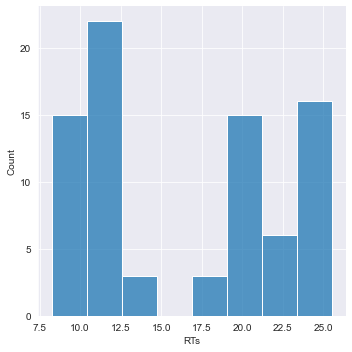

In [31]:
sns.displot(x = "RTs", data = our_data);

Okay, here we can see that there are two clumps of data. Let's see if they correspond to one or more of the categorical variables.

#### Histogram of RTs by one of the categorical variables
We'll use color ("hue" in seaborn-speak) to code the categorical variable "sex".

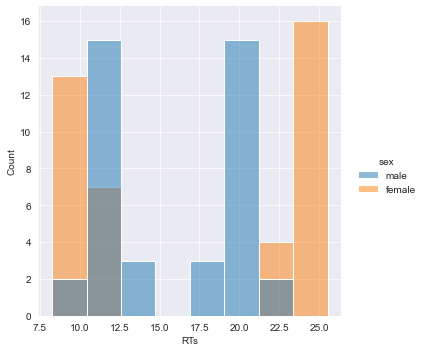

In [32]:
sns.displot(x = "RTs", data = our_data, hue = "sex");

Okay, there might be something going on with females being both faster (left) and slower (right) than males, but there's still something going on here that "sex" isn't capturing. Let's see if "strain" does.

#### Histogram of RTs by the other categorical variable
Now we'll use color ("hue" in seaborn-speak) to code the categorical variable "strain".

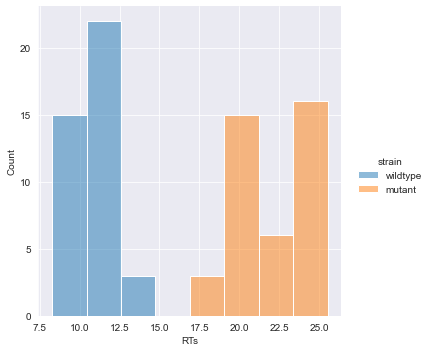

In [33]:
sns.displot(x = "RTs", data = our_data, hue = "strain");

**Aha!** Gotcha – it looks like strain is doing a pretty good job of explaining the two clumps in the histogram. But the histogram of RT x Sex still did look a litte weird. Let's see if we can crack out both variables.

#### Creating a multi-axes figure with a figure level seaborn function

This is where the figure level `seaborn` functions are really handy. We can simply assign a categorical variable to be represented by the columns or rows of a multi-panel figure.

Let's assign "sex" to columns.

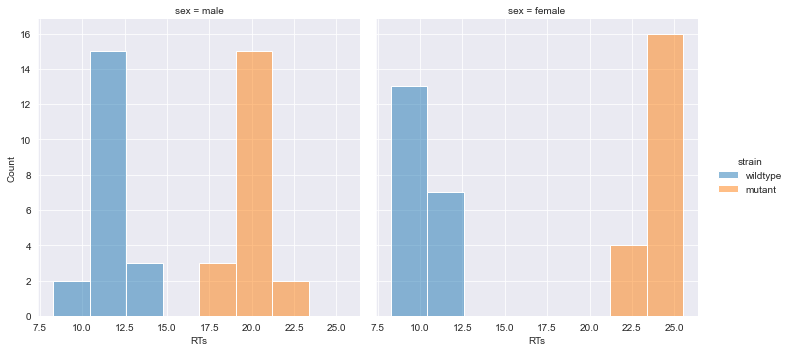

In [34]:
sns.displot(x = "RTs", data = our_data, hue = "strain", col="sex");

Okay, that's great. Now we have males on the left and females on the right. Also, `displot()` has done something really nice, which is to make the x-axis limits the same in the two plots. So the bigger gap in the female data isn't just a visual artifact of the axis scaling.

Still, since the data share a common x-axis, it would be nice to have the plots aligned vertically rather than horizontally. So let's assign sex to the rows rather than the columns.

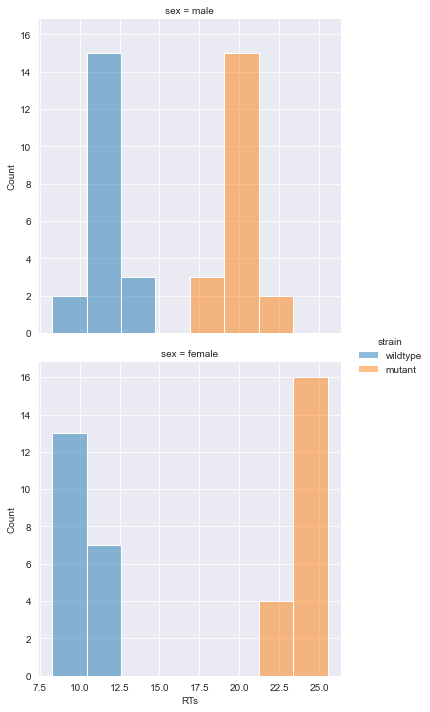

In [35]:
sns.displot(x = "RTs", data = our_data, hue = "strain", row="sex");

Okay, that's much better in terms of making a visual comparison between the sexes. Still, these histrograms are a bit ugly. We could improve that by playing around with the bins. Or we could just ask `displot()` to give us kernel density estimates instead.

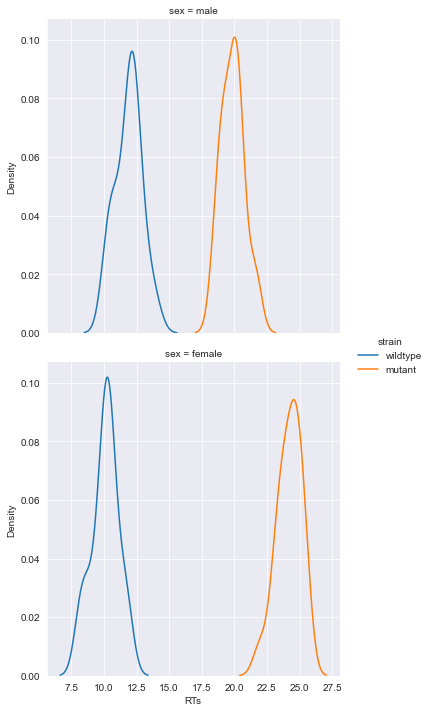

In [36]:
sns.displot(x = "RTs", data = our_data, hue = "strain", row="sex", kind="kde");

Much better. Visually, however, filled KDE's are a bit nicer. Since these are probability densities, it's the area that's important anyway, and having them filled emphasizes the area rather than the height.

We can easily do this by setting a `fill` argument to `True`. Strictly speaking, however, `fill` is not a valid argument to `displot()`. However, what displot will do is pass any named argument (called a "keywork arguement" or "kwarg" in Python) to the underlying axes level function.

The only catch with these `**kwargs` is that they won't appear in the documentation for the figure level plots, only in the documentation for the axes level plots. The documentation for the figure level [plot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot), like `displot()` does helpfully tell us this at least:

---

![displot() kwargs](./assets/jpnb20/displotKwargs.png)

---

So now let's plot with `fill=True` and see if that works.

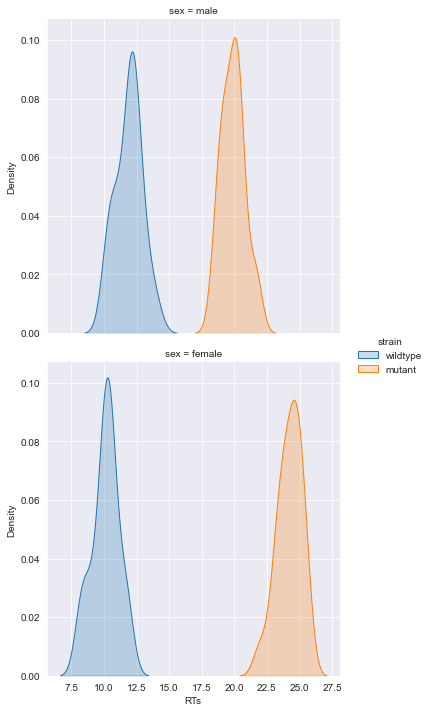

In [37]:
sns.displot(x = "RTs", data = our_data, hue = "strain", row="sex", kind="kde", fill=True);

Ah, much better!

### Categorical plots

The categorical plots are nice because they allow us to separate both of our categorical variables within a single plot.

Let's try playing with `catplot()`

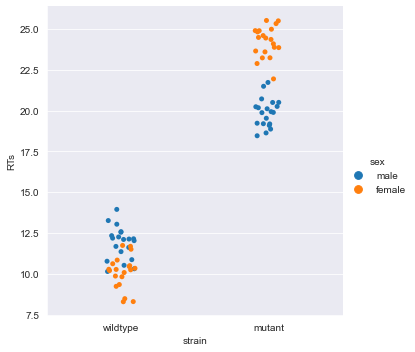

In [38]:
sns.catplot(y = "RTs", x="strain", data = our_data, hue = "sex");

So a `stripplot` is the default axes-level plot (and notice that the default axes-level plots are the first ones listed under their corresponding figure-level counterparts. But we can have it call `boxplot()` for us by telling it that we want `kind="box"`.

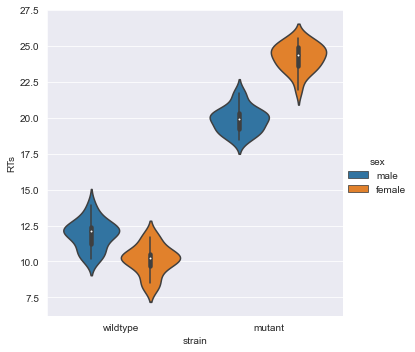

In [39]:
sns.catplot(y = "RTs", x="strain", data = our_data, hue = "sex", kind="violin");

### Axis level plots

We can call any of the axis-level functions directly, without going through the corresponding figure-level function. This gives us more control over single-panel plots should we need it.

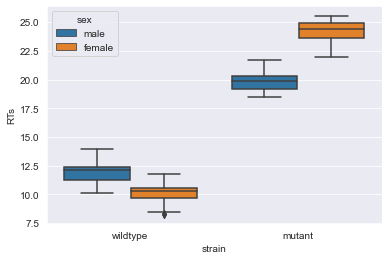

In [40]:
ax = sns.boxplot(y = "RTs", x="strain", data = our_data, hue = "sex");

Notice that we've assigned the output of `sns.boxplot()` to `ax`. So we have an `axes` object (named `ax`), and thus have access to all the things an `axes` knows how to do. So if we type "ax." and a tab, we'll see something like this:
    
---
    
![seaborn_overview](./assets/jpnb20/axesMethods.png)
    
---

So let's do that:

In [41]:
ax

<AxesSubplot:xlabel='strain', ylabel='RTs'>

and now we can scroll around to find useful things. 

Let's try inverting the y axis so that faster times plot visually higher!

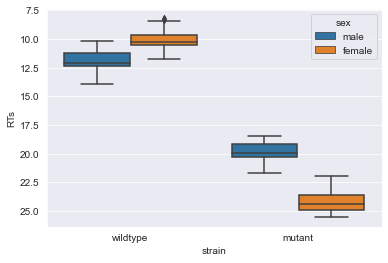

In [42]:
ax = sns.boxplot(y = "RTs", x="strain", data = our_data, hue = "sex");
ax.invert_yaxis();

And we can see a lot of useful stuff by typing `ax.set` and a tab. Among those is `ax.set_title` which we can use to... wait for it... add a title!

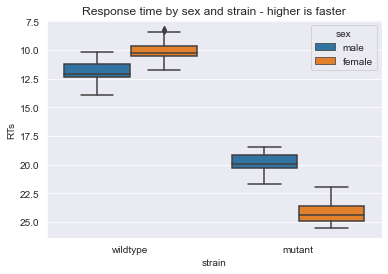

In [43]:
ax = sns.boxplot(y = "RTs", x="strain", data = our_data, hue = "sex");
ax.invert_yaxis();
ax.set_title("Response time by sex and strain - higher is faster");

### Summary
So `seaborn` is a nice way to make plots of data from `pandas` data frames. Its default values make good looking plots. It has two main kinds of plotting functions:

* figure level functions that are handy for making multi axes panel figures
* axes level functions that return an axes object handle to you, allowing for fine control over the plot's appearance



---

### Exercise

To flex both our plotting and function writing muscles, let's write a function to do some plotting! Your function should:

* take a data frame as produced by the function above as input
* allow the user to choose between a strip, violin, or box plot
* set one of the above three be the default
* have a docstr so users can get help() on it
* produce the plot requested by the user (of course!)

Write your function here:

In [44]:
def my_plot_fun(in_data, plot_type = "violin") :
    '''
    Makes a distribution plot of a pandas data frame with columns = 
    "RTs", "sex", and "strain"
    data frame can be of any length
    other seaborn distribution plot types can be specified
    '''
    sns.set_style('darkgrid')
    # do I use an if() : elif() : else?
    
    # or is there an easier way...?
    sns.catplot(y = "RTs", x="strain", data = in_data, hue = "sex", kind=plot_type);

Now get help on it:

In [45]:
help(sns.set_style)

Help on function set_style in module seaborn.rcmod:

set_style(style=None, rc=None)
    Set the parameters that control the general style of the plots.
    
    The style parameters control properties like the color of the background and
    whether a grid is enabled by default. This is accomplished using the
    :ref:`matplotlib rcParams system <matplotlib:matplotlib-rcparams>`.
    
    The options are illustrated in the
    :doc:`aesthetics tutorial <../tutorial/aesthetics>`.
    
    See :func:`axes_style` to get the parameter values.
    
    Parameters
    ----------
    style : dict, or one of {darkgrid, whitegrid, dark, white, ticks}
        A dictionary of parameters or the name of a preconfigured style.
    rc : dict, optional
        Parameter mappings to override the values in the preset seaborn
        style dictionaries. This only updates parameters that are
        considered part of the style definition.
    
    Examples
    --------
    
    .. include:: ../docstrings

And show that it works!

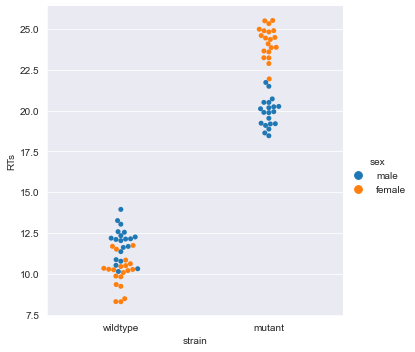

In [46]:
my_plot_fun(our_data, plot_type = "swarm")

Now here's an interesting puzzle... How many times does it take to get a big random number on average? What does the distribution look like?

How would we answer those questions?

Let's use... 

a ***for loop!***

(Here we are going to go ahead of us and use the python library `seaborn`, we will learn more about this library in later tutorials.)

In [51]:
import seaborn as sns  # for making a histogram/kde
import numpy as np

In [52]:
nExperiments = 100  # how many times we'll do our little experiment
nSamplesNeeded = np.zeros((nExperiments, 1))
x, cutOff, = 0, 2

for i in range(nExperiments) :
    myCounter = 0
    x = 0
    while x < cutOff :
        x = np.random.randn()
        myCounter += 1
    nSamplesNeeded[i, 0] = myCounter    
    

That looks like a lot of code, but go through it carefully. All we have done is nest our `while` loop inside a `for` loop, so that we can do our "How many times?" experiment as often as we wish. On each pass through the `for` loop, we store the answer from a single experiment in the `i`th row of a numpy array!

Let's look at the number of tries it took on each experiment:

In [53]:
plt.plot(nSamplesNeeded, '.')

NameError: name 'plt' is not defined

Okay, cool! So it looks like we usually get a "big" number in under 50 tries, but it occasionally takes a lot longer. Let's look at the distribution of these numbers!

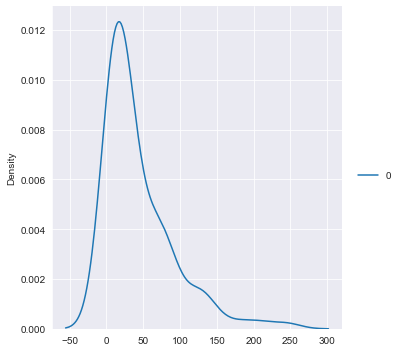

In [54]:
sns.displot(nSamplesNeeded, kind='kde')

Okay, I think that, while pretty, this plot is misleading. Can you see why?

Let's do a plain old histogram.

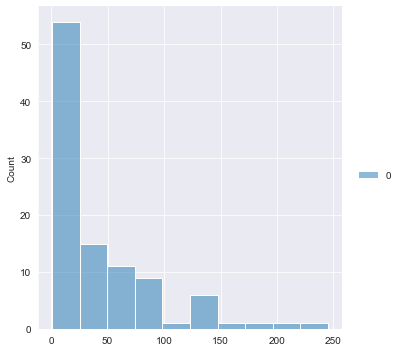

In [55]:
sns.displot(nSamplesNeeded, kind='hist')

Now this make more sense, because we can't have a negative number of tries!

So it looks like, on average, it took us about – what? – 40 tries to get a number in the upper 2 1/2% tail of the distribution. Let's do a quick calculation.

In [56]:
100 / 2.5

40.0